In [13]:
import numpy as np
import matplotlib.pyplot as plt

# INPUT:


In [14]:
num_mirr = 2
starting_ray = [0,0,7,7]                 #(x1,y1,x2,y2)
Mirror_Locations = [[[0,5],[10,5]],[[5,4],[10,4]]]      #[[[x1,y1],[x2,y2]] , [x1,y1,x2,y2] , ......]

In [15]:
rays = []
pos = np.asarray(starting_ray[0:2])
dirn = [ (starting_ray[2] - starting_ray[0]), (starting_ray[3] - starting_ray[1])]
dirn_mag = np.sqrt(np.sum(list(i*i for i in dirn)))
unit_dirn = np.asarray(list(i/dirn_mag for i in dirn))
rays.append(np.asarray([pos , unit_dirn]))

In [16]:
mirrors = []

for Mirror in Mirror_Locations:
    pos = np.asarray(Mirror[0])
    dirn = np.asarray([ (Mirror[1][0] - Mirror[0][0]), (Mirror[1][1] - Mirror[0][1])])
    dirn_mag = np.sqrt(np.sum(list(i*i for i in dirn)))
    unit_dirn = np.asarray(list(i/dirn_mag for i in dirn))
    mirrors.append(np.asarray([pos , unit_dirn, dirn_mag]))

    print(Mirror,"\n")
    print(pos)


[[0, 5], [10, 5]] 

[0 5]
[[5, 4], [10, 4]] 

[5 4]


In [17]:
 def do_reflection(ray, mirrors, intersections = None):
        
        
    if intersections == None:
        intersections = [ray[0]]
    
#     results = []
    l = []
    k = []
    
    for i in range(len(mirrors)):
        mirr = mirrors[i]
        
#         print(mirr)                       #TEST

        a = np.asarray([[ray[1][0],mirr[1][0]],[ray[1][1],mirr[1][1]]])

        b = mirr[0]-ray[0]

        x = np.linalg.solve(a,b)
        
        l.append(x[0])
        k.append(-x[1])
        
        
#     print(l)                                     #TEST
#     print(k)                                     #test
        
    min_i = None
    min_l = np.inf
    
    for i in range(len(mirrors)):
        
        mirr = mirrors[i]
#         print("in loop", k[i], l[i])
        
        if k[i]>0 and k[i]<mirr[2]:
            
#             print("if 1")
            
            if l[i]>0:
#                 print("if 1")
                
                if l[i] < min_l:
#                     print("if 1")
                    
                    min_l = l[i]
                    min_i = i
                    
#                     print("min updated")
    
#     print("Chumma ",min_l,min_i)
    
    if min_i == None:
        if ray[1][0] > 0:
#             print("Hit x10... but where?")                                    #WHEREEEE??????
            
            a = np.asarray([[ray[1][0], 0],[ray[1][1], 1]])

            b = np.array([10,0]) - ray[0]

            x = np.linalg.solve(a,b)

            l = x[0]
            
            final_pos = ray[0]+l*ray[1]
            
#             print(a,b,x,l, sep="\n")

            intersections.append(final_pos)
            
            return final_pos, intersections  
    
            
        else:
            print("None broo  ", ray )                                #Chanhe to None
            
    else:
        intersection_point = ray[0] + min_l * ray[1]
        
        intersections.append(intersection_point)
        
        normal = np.array([[0,-1],[1,0]]) @ mirrors[min_i][1] 
        
        u = ray[1]
        
        v = u - 2*(np.dot(u,normal))*normal
        
        reflected_ray = [intersection_point, v]
        
        return do_reflection( reflected_ray, mirrors, intersections )
        
#         results.append(mirr, ray, l, k)

final point is at [10.  4.]


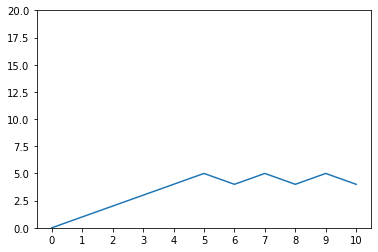

In [18]:

final_point, intersections = do_reflection(rays[0],mirrors)

# for point in intersetions:
x_coords = list(point[0] for point in intersections)
y_coords = list(point[1] for point in intersections)

plt.plot(x_coords,y_coords)
plt.xticks(np.arange(0,11,1))
plt.ylim(0,20)

print("final point is at" ,final_point)

# Testing only

In [238]:
intersections

[array([5., 5.]),
 array([6., 4.]),
 array([7., 5.]),
 array([8., 4.]),
 array([9., 5.]),
 array([10.,  4.])]

In [5]:
starting_ray[0:2]

[0, 0]

In [80]:
print(rays)

[array([[0.        , 0.        ],
       [0.70710678, 0.70710678]])]


In [81]:
print(mirrors)

[array([array([0, 5]), array([1., 0.]), 10.0], dtype=object)]


In [79]:
ray[0]

array([0., 0.])

In [83]:
x

array([ 7.07106781, -5.        ])

In [84]:
a

array([[0.70710678, 1.        ],
       [0.70710678, 0.        ]])

In [85]:
b

array([0., 5.])

In [78]:
mirr[0]

array([0, 5])

In [160]:
mirrors

[array([array([0, 5]), array([1., 0.]), 10.0], dtype=object),
 array([array([5, 4]), array([1., 0.]), 5.0], dtype=object)]

In [110]:
np.rot90(np.array([0,1]))

ValueError: Axes must be different.

In [161]:
rays

[array([[0.        , 0.        ],
        [0.70710678, 0.70710678]])]